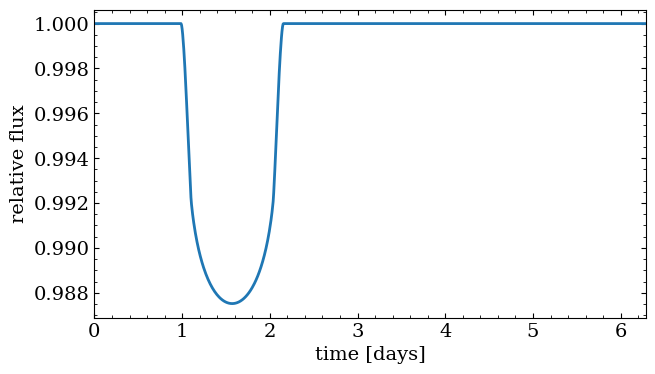

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import exoplanet as xo

# The light curve calculation requires an orbit
orbit = xo.orbits.KeplerianOrbit(period=2*np.pi, omega=0.0, Omega=np.pi, t0=np.pi/2, a=2)

# Compute a limb-darkened light curve using starry
t = np.linspace(0, 2*np.pi, 1000)
u = [0.5, 0.2]
light_curve = (
    xo.LimbDarkLightCurve(*u)
    .get_light_curve(orbit=orbit, r=0.1, t=t)
    .eval()
) + 1
# Note: the `eval` is needed because this is using Theano in
# the background

plt.plot(t, light_curve, color="C0", lw=2)
plt.ylabel("relative flux")
plt.xlabel("time [days]")
_ = plt.xlim(t.min(), t.max())


In [8]:
np.save('xo_flux.npy', light_curve)